In [319]:
# show all outputs of a cell in a jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [320]:
# import libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [321]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Read the data into Google Colab using .read_csv() function.

In [322]:
l_exp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HW6 data.csv')

##2. To simplify the analysis, for each country in the dataframe, only keep the most recent year of data (i.e., 2015) and remove the rest rows.

In [323]:
l_exp = l_exp.loc[l_exp['Year'] == 2015]

##3. To simplify the analysis further, only keep the afore-listed features (plus the country name) and the target in the dataframe and remove the other features. Index the dataframe using the country name.

In [324]:
# Remove any leading and trailing of the string
l_exp.columns = l_exp.columns.to_series().apply(lambda x: x.strip())
# Remove the two spaces (if any) between every two words
l_exp.columns = l_exp.columns.str.replace('  ', ' ')

print(l_exp.columns)

l_exp = l_exp[['Status','Hepatitis B','Polio','Diphtheria','BMI','thinness 1-19 years','Alcohol','GDP','percentage expenditure','Income composition of resources','Schooling','Life expectancy','Country']]

# Set country names as the index
l_exp = l_exp.set_index('Country')

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


##4. Print the first and last ten rows of the dataframe using .head() and .tail() functions. How many observations (i.e., sample size) do you have in total?

In [325]:
l_exp.head()
l_exp.tail()
print('\n')
print('Sample size: ', len(l_exp))
# 2923 observations in total

,Status,Hepatitis B,Polio,Diphtheria,BMI,thinness 1-19 years,Alcohol,GDP,percentage expenditure,Income composition of resources,Schooling,Life expectancy
Country,,,,,,,,,,,,
Afghanistan,Developing,65.0,6.0,65.0,19.1,17.2,0.01,584.259210,71.279624,0.479,10.1,65.0
Albania,Developing,99.0,99.0,99.0,58.0,1.2,4.60,3954.227830,364.975229,0.762,14.2,77.8
Algeria,Developing,95.0,95.0,95.0,59.5,6.0,NaN,4132.762920,0.000000,0.743,14.4,75.6
Angola,Developing,64.0,7.0,64.0,23.3,8.3,NaN,3695.793748,0.000000,0.531,11.4,52.4
Antigua and Barbuda,Developing,99.0,86.0,99.0,47.7,3.3,NaN,13566.954100,0.000000,0.784,13.9,76.4


,Status,Hepatitis B,Polio,Diphtheria,BMI,thinness 1-19 years,Alcohol,GDP,percentage expenditure,Income composition of resources,Schooling,Life expectancy
Country,,,,,,,,,,,,
Venezuela (Bolivarian Republic of),Developing,87.0,87.0,87.0,62.1,1.6,NaN,NaN,0.0,0.769,14.3,74.1
Viet Nam,Developing,97.0,97.0,97.0,17.5,14.2,NaN,NaN,0.0,0.678,12.6,76.0
Yemen,Developing,69.0,63.0,69.0,41.3,13.6,NaN,NaN,0.0,0.499,9.0,65.7
Zambia,Developing,9.0,9.0,9.0,23.4,6.3,NaN,1313.889646,0.0,0.576,12.5,61.8
Zimbabwe,Developing,87.0,88.0,87.0,31.8,5.6,NaN,118.693830,0.0,0.507,10.3,67.0




Sample size:  183


## 5. Which country has the highest life expectancy? Which country has the lowest?

In [326]:
# Find country with highest life expectancy
max_l_exp = l_exp[l_exp['Life expectancy'] == l_exp['Life expectancy'].max()].index[0]
print(max_l_exp, "has the highest life expectancy of", l_exp['Life expectancy'].max())

# Find country with lowest life expectancy
min_l_exp = l_exp[l_exp['Life expectancy'] == l_exp['Life expectancy'].min()].index[0]
print(min_l_exp, "has the lowest life expectancy of", l_exp['Life expectancy'].min())

Slovenia has the highest life expectancy of 88.0
Sierra Leone has the lowest life expectancy of 51.0


##6. Use .info() to get a short description of the dataframe.

In [327]:
l_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, Afghanistan to Zimbabwe
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           183 non-null    object 
 1   Hepatitis B                      174 non-null    float64
 2   Polio                            183 non-null    float64
 3   Diphtheria                       183 non-null    float64
 4   BMI                              181 non-null    float64
 5   thinness 1-19 years              181 non-null    float64
 6   Alcohol                          6 non-null      float64
 7   GDP                              154 non-null    float64
 8   percentage expenditure           183 non-null    float64
 9   Income composition of resources  173 non-null    float64
 10  Schooling                        173 non-null    float64
 11  Life expectancy                  183 non-null    float64
dtypes: float64(1

##7. Take a look at the categorical feature (i.e., Status) using .value_counts() function.

In [328]:
l_exp['Status'].value_counts()

Developing    151
Developed      32
Name: Status, dtype: int64

##8. Report the descriptive statistics of the numerical features using .describe() function.

In [329]:
l_exp.describe()

,Hepatitis B,Polio,Diphtheria,BMI,thinness 1-19 years,Alcohol,GDP,percentage expenditure,Income composition of resources,Schooling,Life expectancy
count,174.000000,183.000000,183.000000,181.000000,181.000000,6.000000,154.000000,183.000000,173.000000,173.000000,183.000000
mean,82.425287,83.207650,84.633880,42.754144,4.534807,5.288333,7185.331746,2.383906,0.691740,12.927168,71.616940
std,24.008492,24.245778,22.162793,20.685702,4.099425,4.038115,11697.508913,27.461032,0.153412,2.912366,8.123706
min,6.000000,5.000000,6.000000,2.500000,0.100000,0.010000,33.681223,0.000000,0.347000,4.900000,51.000000
25%,78.750000,83.000000,83.500000,24.300000,1.500000,2.492500,766.008101,0.000000,0.565000,10.800000,65.750000
50%,93.000000,93.000000,93.000000,48.600000,3.500000,5.285000,2916.228918,0.000000,0.723000,13.100000,73.900000
75%,97.000000,97.000000,97.000000,61.400000,6.500000,8.017500,7290.107448,0.000000,0.798000,15.000000,76.950000
max,99.000000,99.000000,99.000000,77.600000,26.700000,10.660000,66346.522670,364.975229,0.948000,20.400000,88.000000


##9. Plot histograms for each numerical feature.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ebd1dd940>,
      dtype=object)

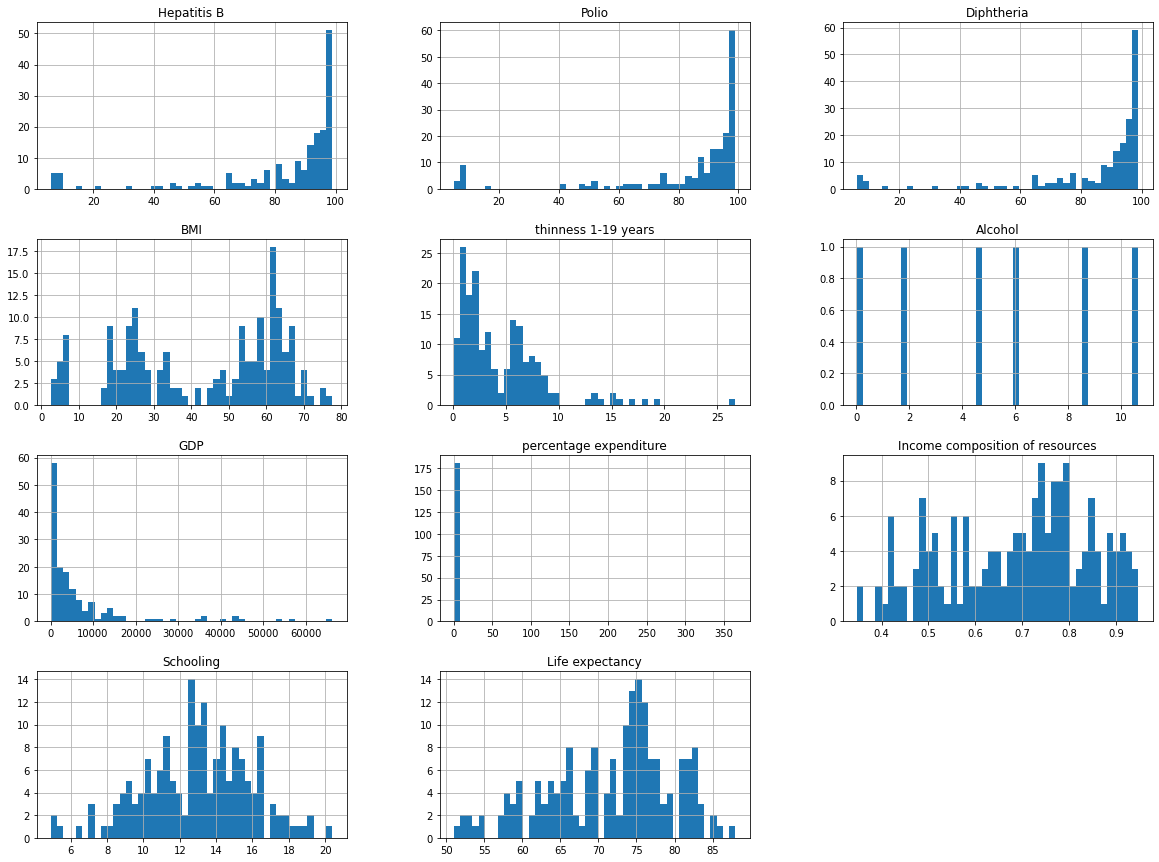

In [330]:
l_exp.hist(bins=45,figsize=(20,15))

##10. Plot a scatter matrix of all features and the target. Pay special attention to the bivariate relationship between each of the features and the target. What relationships can you tell, if any, between any features and the target (describe the direction of a relationship: positive or negative)?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ebcb376a0>,
      dtype=object)

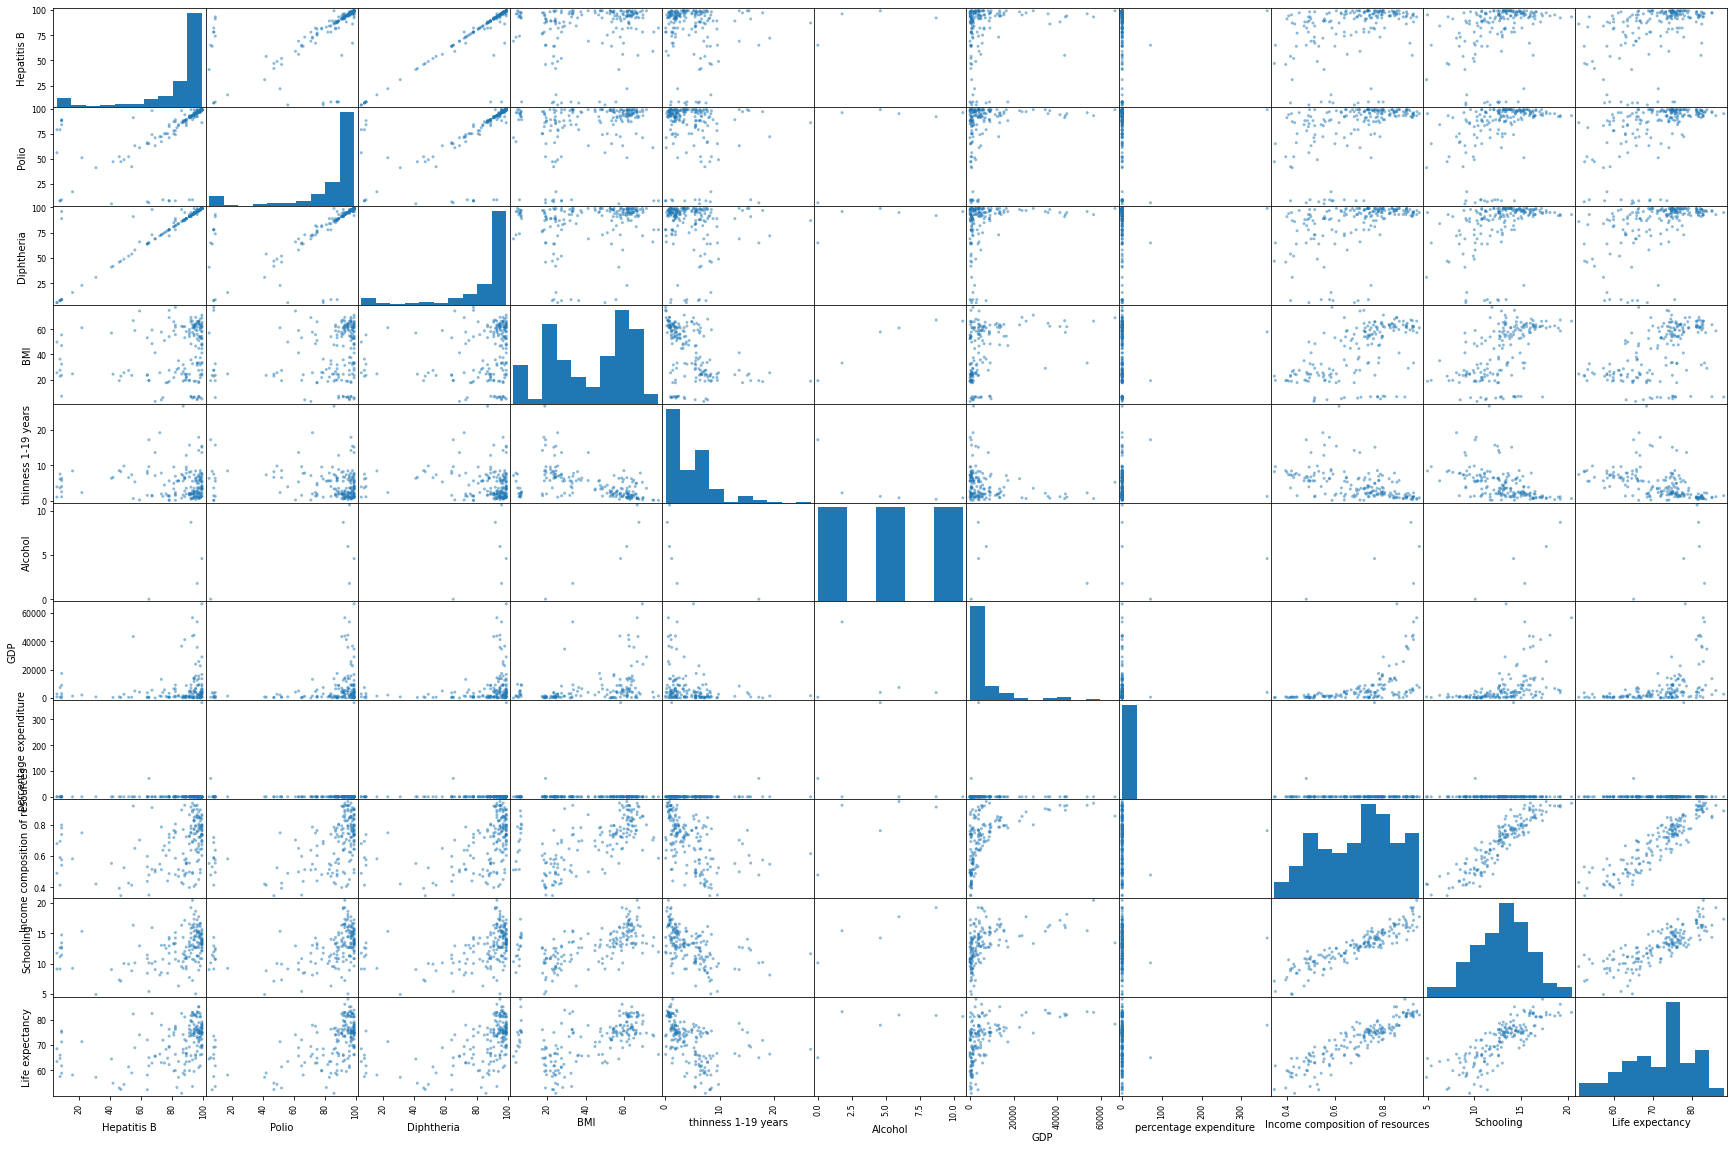

In [331]:
attributes = ['Status','Hepatitis B','Polio','Diphtheria','BMI','thinness 1-19 years','Alcohol','GDP','percentage expenditure','Income composition of resources','Schooling','Life expectancy']
scatter_matrix(l_exp[attributes], figsize = (30, 20))

###Positive relationship between feature and target: BMI, Income composition of resources, Schooling
###Negative relationship between feature and target: thinness 1-19 years old

##11. Plot a single scatter plot for GDP per capita (on the x-axis) and life expectancy (on the y-axis). Add a linear regression line to the scatter plot. Describe the relationship between GDP per capita and life expectancy.

Status                               0
Hepatitis B                          9
Polio                                0
Diphtheria                           0
BMI                                  2
thinness 1-19 years                  2
Alcohol                            177
GDP                                 29
percentage expenditure               0
Income composition of resources     10
Schooling                           10
Life expectancy                      0
dtype: int64

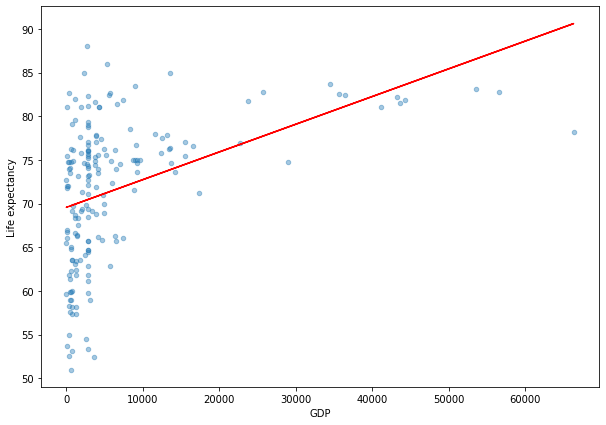

In [332]:
# Check null values of all features
l_exp.isnull().sum()

# Remove missing value in GDP with mean value
l_exp['GDP'].fillna(l_exp['GDP'].median(), inplace = True)

# Plot a single scatter plot for GDP and life expectancy
l_exp.plot(
    kind = 'scatter', # draw a scatter plot
    x = 'GDP', # feature at x-axis
    y = 'Life expectancy', # feature at y-axis
    alpha = 0.4, # marker transparency level
    figsize = (10, 7), # figure width and height
    cmap = plt.get_cmap('jet') # call a predefined color map
  )

# Add a linear regression line
m, b = np.polyfit(l_exp['GDP'], l_exp['Life expectancy'], 1)
plt.plot(l_exp['GDP'], m * l_exp['GDP'] + b, 'r')

## 12. Create a pipeline to process numerical features using .Pipeline() function. In the pipeline, include the following two processes: first, replace missing values of a feature with its median; and second, standardize the feature.

In [333]:
# seperate the target (charges) from the features
y = np.c_[l_exp['Life expectancy']] # target
X = l_exp.drop('Life expectancy', axis = 1) # features
print(X.shape)
print(y.shape)

# create a pipeline to process numerical features
num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')), # replace missing values, if any, with the median of a feature
    ('std_scaler', StandardScaler()) # standardize a feature
  ])

(183, 11)
(183, 1)


##13. Create a full pipeline to process both numerical and categorical features using .ColumnTransformer() function. Use .OneHotEncoder() function to one hot encode the categorical feasure (i.e., Status).

In [334]:
# provide a list of numerical features and a list of categorical features
num_features = ['Hepatitis B','Polio','Diphtheria','BMI','thinness 1-19 years','Alcohol','GDP','percentage expenditure','Income composition of resources','Schooling']
cat_features = ['Status']

# create a full pipeline to process both numerical and categorical features
full_pipline = ColumnTransformer([
  ('num', num_pipline, num_features), # process numerical features using the numerical feature pipline created
  ('cat', OneHotEncoder(), cat_features) # process categorical features using one-hot encoder
  ])

##14. Separate the target from the features and make them two separate NumPy arrays. Then split the dataframe into train and test sets. Include 20% of the data in the test set.

In [335]:
# split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, # features 
    y, # target
    test_size = 0.2, # 20% data to be included in the test set 
    random_state = 42 # specify random seed for results replication
  )

##15. Fit and transform the train set using the full pipeline.

In [336]:
X_train = full_pipline.fit_transform(X_train)

##16. Transform the test set using the full pipeline.

In [337]:
X_test = full_pipline.transform(X_test)

##17. Train the train set using linear regression.

In [338]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

##18. Print the first five predictions from the trained linear regression.

In [339]:
print(lin_reg.predict(X_train[:5])) # predict the labels for the first 5 instances using the fitted linear model
print('\n')
print(list(y_train[:5])) # print the true labels

[[74.27753286]
 [57.1704587 ]
 [80.11129533]
 [66.85078387]
 [76.38565949]]


[array([73.6]), array([59.]), array([82.2]), array([71.8]), array([79.1])]


##19. Calculate the root mean square error (RMSE) using the test set.

In [340]:
y_pred_lin = lin_reg.predict(X_test) # predict life expectancy
lin_mse = mean_squared_error(y_pred_lin, y_test) # calculate mean squared error
lin_rmse = np.sqrt(lin_mse) # calculate rmse
print(lin_rmse)

4.950175730282589


##20. Conduct 5-fold cross-validation using a random-forest regression and calculate the mean RMSE on the train set.

In [341]:
# build a function to display cross-validation scores
def display_scores(scores):
  print('scores:', scores) # print all scores
  print('mean:', scores.mean()) # print the mean of scores
  print('standard deviation:', scores.std()) # print the standard deviation of scores

In [342]:
forest_reg = RandomForestRegressor()
scores = cross_val_score(
    forest_reg, # model 
    X_train, # features
    y_train.ravel(), # target, change shape from (rows, 1) to (rows, ) as required
    scoring = 'neg_mean_squared_error', # -1 * mean squared error
    cv = 5 # number of cross-validations to run
  )
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

scores: [2.30067233 6.21425972 3.46564175 3.29426244 3.86632933]
mean: 3.82823311396051
standard deviation: 1.2995855797904312


##21. Conduct a grid search for the random-forest regression. Search values for the two hyperparameters: n_estimators and max_features.

In [343]:
# conduct a grid search for the random-forest model
param_grid = [{
    'n_estimators': np.arange(10, 100, 10), # number of trees to grow
    'max_features': np.arange(1, X_train.shape[1] + 1) # maximum number of features
  }]
grid_search = GridSearchCV(
    forest_reg, # model
    param_grid, # parameters grid
    cv = 5, # number of cross-validations to run
    scoring = 'neg_mean_squared_error', # -1 * mean squared error
    return_train_score = True)
grid_search.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
                          'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])}],
             return_train_score=True, scoring='neg_mean_squared_error')

##22. Report the best parameter values.

In [344]:
# get the best parameter values
grid_search.best_params_

{'max_features': 2, 'n_estimators': 10}

##23. Use the best model as the final model, and evaluate that model on the test set. What is the value of the RMSE?

In [345]:
# evaluate the model on the test set
final_model = grid_search.best_estimator_ # use the best model as the final model
y_pred_final = final_model.predict(X_test)
final_mse = mean_squared_error(y_pred_final, y_test)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

3.801025466186011


##24. (Bonus question: no reduction of points if no or wrong answer. Receive 0.5 additional points for a correct answer) Fit the final model on the entire dataset (i.e., train and test sets combined). Print the feature importance side-by-side with the corresponding feature name, and sort by the descending order of feature importance. Which are the top three features with the highest feature importance?

In [346]:
X_entire = full_pipline.fit_transform(X)

y_pred_final_entire_set = final_model.predict(X_entire)
final_mse_entire_set = mean_squared_error(y_pred_final_entire_set, y)
final_rmse_entire_set = np.sqrt(final_mse_entire_set)
print(final_rmse_entire_set)

2.8071263722791944


In [347]:
# print feature importance for all features
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

# print the feature importance side-by-side with correponding feature name
cat_encoder = full_pipline.named_transformers_['cat'] # the categories added by the full pipline under the transformer 'cat'
cat_one_hot_features = [item for sublist in cat_encoder.categories_ for item in sublist] # flatten the list
features = num_features + cat_one_hot_features
sorted(zip(feature_importances, features), reverse = True) # sort by the descending order of feature importance

[4.65993064e-02 5.90517187e-02 1.48186639e-01 9.61301368e-02
 1.43671294e-01 1.02636680e-04 4.14813454e-02 0.00000000e+00
 1.88682401e-01 2.35912512e-01 1.72326992e-02 2.29493103e-02]


[(0.23591251171470531, 'Schooling'),
 (0.18868240128705133, 'Income composition of resources'),
 (0.1481866391634371, 'Diphtheria'),
 (0.14367129428614714, 'thinness 1-19 years'),
 (0.09613013679555965, 'BMI'),
 (0.05905171869368334, 'Polio'),
 (0.04659930640264336, 'Hepatitis B'),
 (0.04148134544932164, 'GDP'),
 (0.022949310338550726, 'Developing'),
 (0.01723269918888412, 'Developed'),
 (0.00010263668001629067, 'Alcohol'),
 (0.0, 'percentage expenditure')]

**Top three features with the highest feature importance:** 'Schooling', 'Income composition of resources', 'BMI'.